In [19]:
from nltk.tokenize import *
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from sklearn import metrics as mt
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from matplotlib.ticker import *
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

%matplotlib inline


In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookaair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/macbookaair/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookaair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookaair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# !kaggle datasets download praveengovi/emotions-dataset-for-nlp
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download praveengovi/emotions-dataset-for-nlp
# !unzip emotions-dataset-for-nlp.zip


In [22]:
train = pd.read_csv('train.txt', sep=';', names=['text', 'emotion'])
test = pd.read_csv('test.txt', sep=';', names=['text', 'emotion'])
val = pd.read_csv('val.txt', sep=';', names=['text', 'emotion'])

In [23]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    root_word = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(root_word)

train['text'] = train['text'].apply(lambda text : lemmatize_text(text))

val['text'] = val['text'].apply(lambda text : lemmatize_text(text))

test['text'] = test['text'].apply(lambda text : lemmatize_text(text))

In [24]:
train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [25]:
train.emotion.value_counts()

emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [26]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    clean_token = [token for token in tokens if token not in stop_words]
    return ' '.join(clean_token)

In [27]:
def featurize(text):
  dict_feature = {}
  dict_feature['Lenght'] = len(text)/100
  for token in word_tokenize(text):
    if token not in dict_feature:
      dict_feature[token] = 0
      dict_feature[token] += 1
  return dict_feature
  # return {x : 1 for x in word_tokenize(text)}

In [28]:
# vectorizer = DictVectorizer(sparse = True)
# train_features = train['text'].apply(remove_stopwords)
# train_features = train['text'].apply(featurize)
# train_feature_vectors = vectorizer.fit_transform(train_features)

In [29]:
# test_features = test['text'].apply(remove_stopwords)
# test_features = test['text'].apply(featurize)
# test_feature_vectors = vectorizer.transform(test_features)

In [30]:
# val_features = train['text'].apply(remove_stopwords)
# val_features = test['text'].apply(featurize)
# val_feature_vectors = vectorizer.transform(test_features)

In [31]:
nb_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('nb', MultinomialNB())
])

rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])

lg_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('lg', LogisticRegression())
])

xg_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('xg', XGBClassifier())
])

ml_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('ml', MLPClassifier())
])

sv_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('sv', SVC())
])

In [32]:
n_features, n_classes = train.shape[1], np.unique(train['emotion'])

n_features, n_classes

(2,
 array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object))

In [18]:
# lg_params = {
#  'tvec__max_features':[2000,5000,6000],
#  'tvec__ngram_range': [(1,1),(1, 2),(2,2)],
#  'tvec__stop_words': ['english'],
#  'lg__C': [100,10,1],
#  'lg__solver' : ['lbfgs','newton-cg','newton-cholesky','sag','saga']
# }

# nb_params = {
#  'tvec__max_features':[2000,5000,6000],
#  'tvec__ngram_range': [(1,1),(1, 2),(2,2)],
#  'tvec__stop_words': ['english'],
#  'nb__alpha': [0.5,1.0],
#  'nb__fit_prior': [True,False],
#  'nb__class_prior': [[0.1]* len(n_classes),[0.2]* len(n_classes)]
# }

# rf_params = {
#  'tvec__max_features':[2000,5000,6000],
#  'tvec__ngram_range': [(1,1),(1, 2),(2,2)],
#  'tvec__stop_words': ['english'],
#  'rf__criterion' :['gini','entropy'],
#  'rf__n_estimators' : [10, 100, 1000,2000],
#  'rf__max_features' : ['sqrt',log2']
# }

# xg_params = {
#  'tvec__max_features':[2000,5000,6000],
#  'tvec__ngram_range': [(1,1),(1, 2),(2,2)],
#  'tvec__stop_words': ['english'],
#  'xg__max_leaves': (3,4,5,10),
#  'xg__max_depth': (2,4,6,8,10,20,40,50,100,200,400,1000),
#  'xg__min_child_weight': [5],
#  'xg__gamma': [2],
#  'xg__subsample': [1],
#  'xg__colsample_bytree': [0.2,0.4,0.6,0.8],
# }

# ml_params = {
#  'tvec__max_features':[2000,5000,6000],
#  'tvec__ngram_range': [(1,1),(1, 2),(2,2)],
#  'tvec__stop_words': ['english'],
#  'ml__hidden_layer_sizes': [(10,30,10),(20,)],
#  'ml__activation': ['relu','tanh],
#  'ml__solver': ['adam','lbfgs'],
#  'ml__learning_rate': ['constant'],
# }

# sv_params = {
#  'tvec__max_features':[6000],
#  'tvec__ngram_range': [(1,1),(1, 2),(2,2)],
#  'tvec__stop_words': ['english'],
#  'sv__C':[0.01,0.1,1,10,100,1000],
#  'sv__gamma':[1,0.1,0.001,0.0001],
#  'sv__kernel':['linear','rbf']
# }



SyntaxError: unterminated string literal (detected at line 24) (3762304208.py, line 24)

In [33]:
lg_params = {
 'tvec__max_features':[6000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'lg__C': [10],
 'lg__solver' : ['newton-cholesky']
}

nb_params = {
 'tvec__max_features':[6000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'nb__alpha': [1.0],
 'nb__fit_prior': [True],
 'nb__class_prior': [[0.1]* len(n_classes)]
}

rf_params = {
 'tvec__max_features':[6000],
 'tvec__ngram_range': [(1,1)],
 'tvec__stop_words': ['english'],
 'rf__criterion' :['gini'],
 'rf__n_estimators' : [2000],
 'rf__max_features' : ['log2']
}

xg_params = {
 'tvec__max_features':[6000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'xg__max_leaves': [2],
 'xg__max_depth': [200],
 'xg__min_child_weight': [5],
 'xg__gamma': [2],
 'xg__subsample': [1],
 'xg__colsample_bytree': [0.6],
}

ml_params = {
 'tvec__max_features':[6000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'ml__hidden_layer_sizes': [(20,)],
 'ml__activation': ['relu'],
 'ml__solver': ['adam'],
 'ml__learning_rate': ['constant'],
}

sv_params = {
 'tvec__max_features':[6000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'sv__C':[1],
 'sv__gamma':[1],
 'sv__kernel':['linear']
}


In [34]:
nb_gs = GridSearchCV(nb_pipe, param_grid=nb_params,verbose = 1, cv = 5, n_jobs = -1)

nb_gs.fit(train['text'], train['emotion'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [1.0],
                         'nb__class_prior': [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]],
                         'nb__fit_prior': [True], 'tvec__max_features': [6000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [35]:
nb_model = nb_gs.best_estimator_
nb_model_par = nb_gs.best_params_
nb_model_par

{'nb__alpha': 1.0,
 'nb__class_prior': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'nb__fit_prior': True,
 'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [36]:
nb_gs.score(train['text'], train['emotion'])

0.9381875

In [37]:
nb_gs.score(val['text'], val['emotion'])

0.871

In [38]:
nb_gs_predict = nb_model.predict(val['text'])

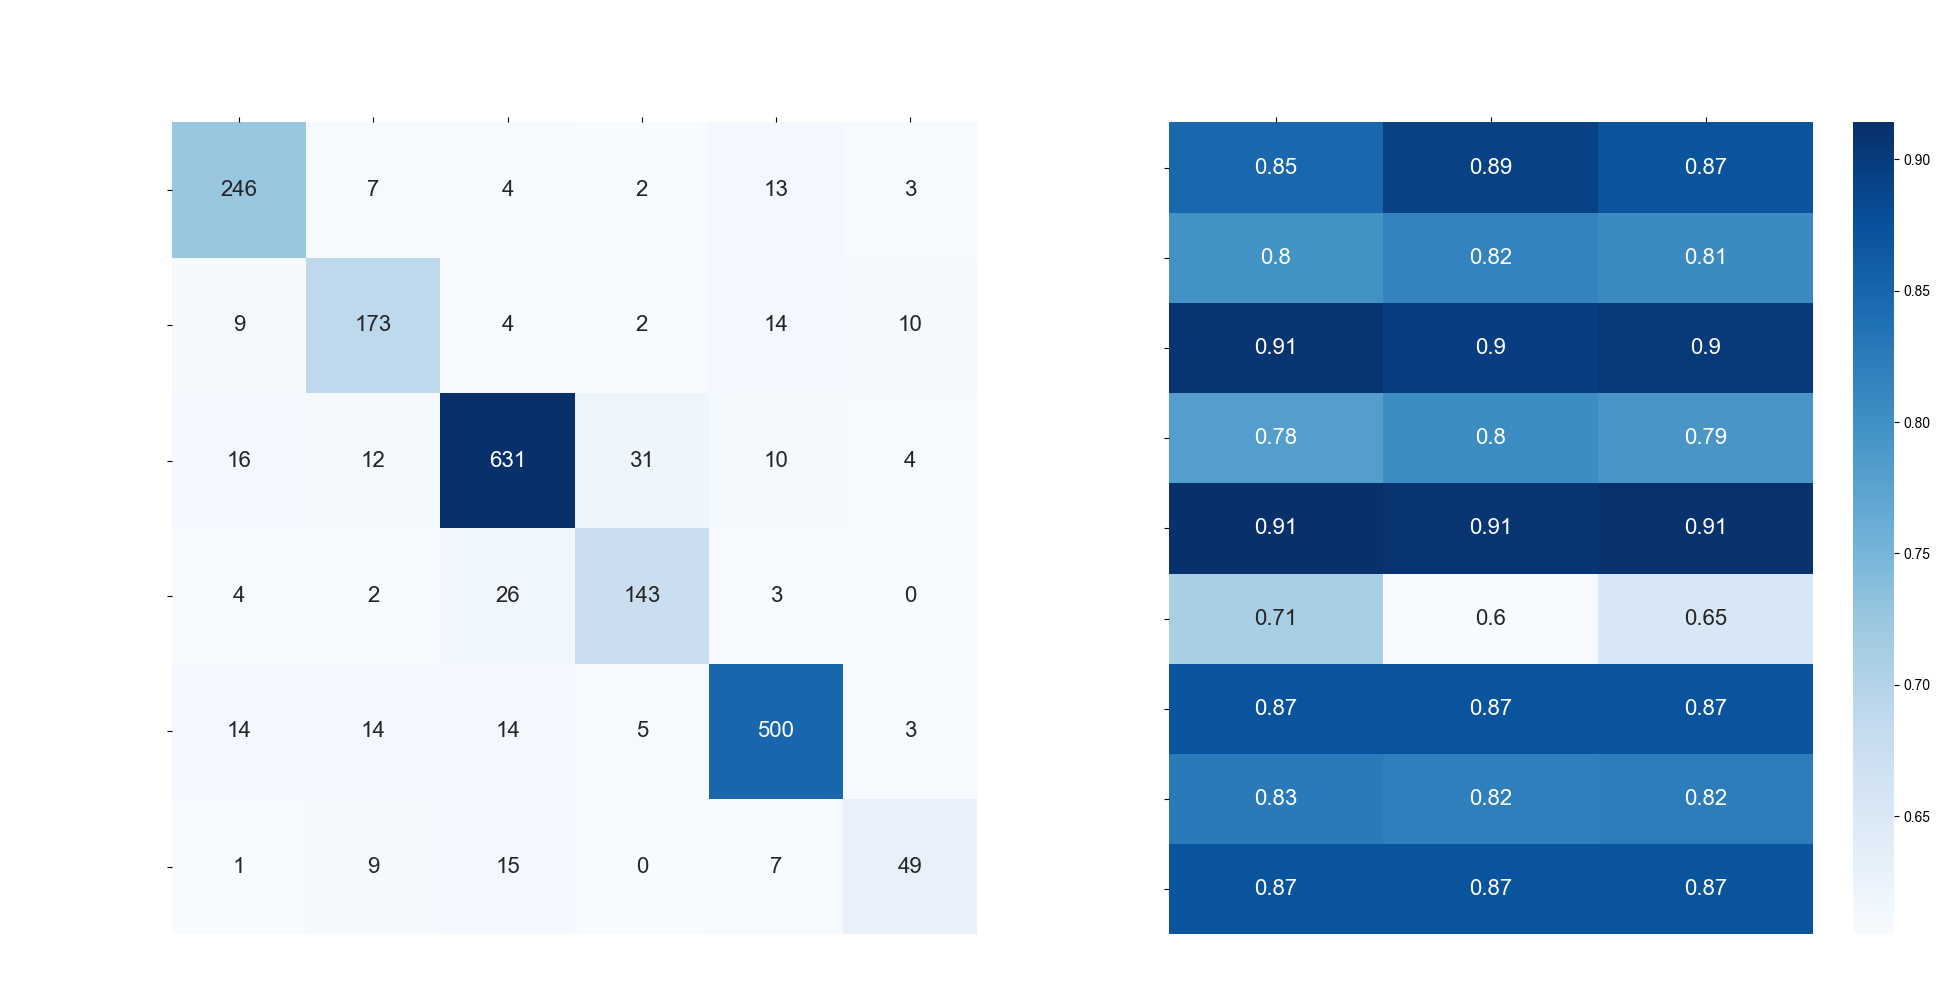

In [39]:
report = classification_report(val['emotion'], nb_gs_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(val['emotion'], nb_gs_predict)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1).xaxis.tick_top()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',cbar_kws=None, cbar=False,annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=30, weight='bold', color='white',pad = 30)
plt.ylabel('True Label', fontsize=25, color='white',weight='bold')
plt.xlabel('Predicted Label', fontsize=25, color='white',weight='bold')
plt.xticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)
plt.yticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)


plt.subplot(1, 2, 2).xaxis.tick_top()
plt.title("Classification Report", fontdict={'size': 30, 'weight': 'bold', 'color': 'white'},pad= 30)
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', cbar_kws=None, annot_kws={"size": 16})
plt.xticks(color='white',fontsize=20)
plt.yticks(color='white',fontsize=20,rotation = 0)


sns.set_theme(rc={'axes.facecolor':'gray', 'figure.facecolor':'black'})
plt.tight_layout()
plt.show()

In [40]:
print(classification_report(val['emotion'], nb_gs_predict))

              precision    recall  f1-score   support

       anger       0.85      0.89      0.87       275
        fear       0.80      0.82      0.81       212
         joy       0.91      0.90      0.90       704
        love       0.78      0.80      0.79       178
     sadness       0.91      0.91      0.91       550
    surprise       0.71      0.60      0.65        81

    accuracy                           0.87      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.87      0.87      0.87      2000



In [41]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params,verbose = 1, cv = 5, n_jobs = -1)

rf_gs.fit(train['text'], train['emotion'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini'],
                         'rf__max_features': ['log2'],
                         'rf__n_estimators': [2000],
                         'tvec__max_features': [6000],
                         'tvec__ngram_range': [(1, 1)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [48]:
rf_model = rf_gs.best_estimator_
rf_model_par = rf_gs.best_params_
rf_model_par

{'rf__criterion': 'gini',
 'rf__max_features': 'log2',
 'rf__n_estimators': 2000,
 'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [49]:
rf_gs.score(train['text'], train['emotion'])

0.9970625

In [44]:
rf_gs.score(val['text'], val['emotion'])

0.8975

In [50]:
rf_gs_predict = rf_model.predict(val['text'])

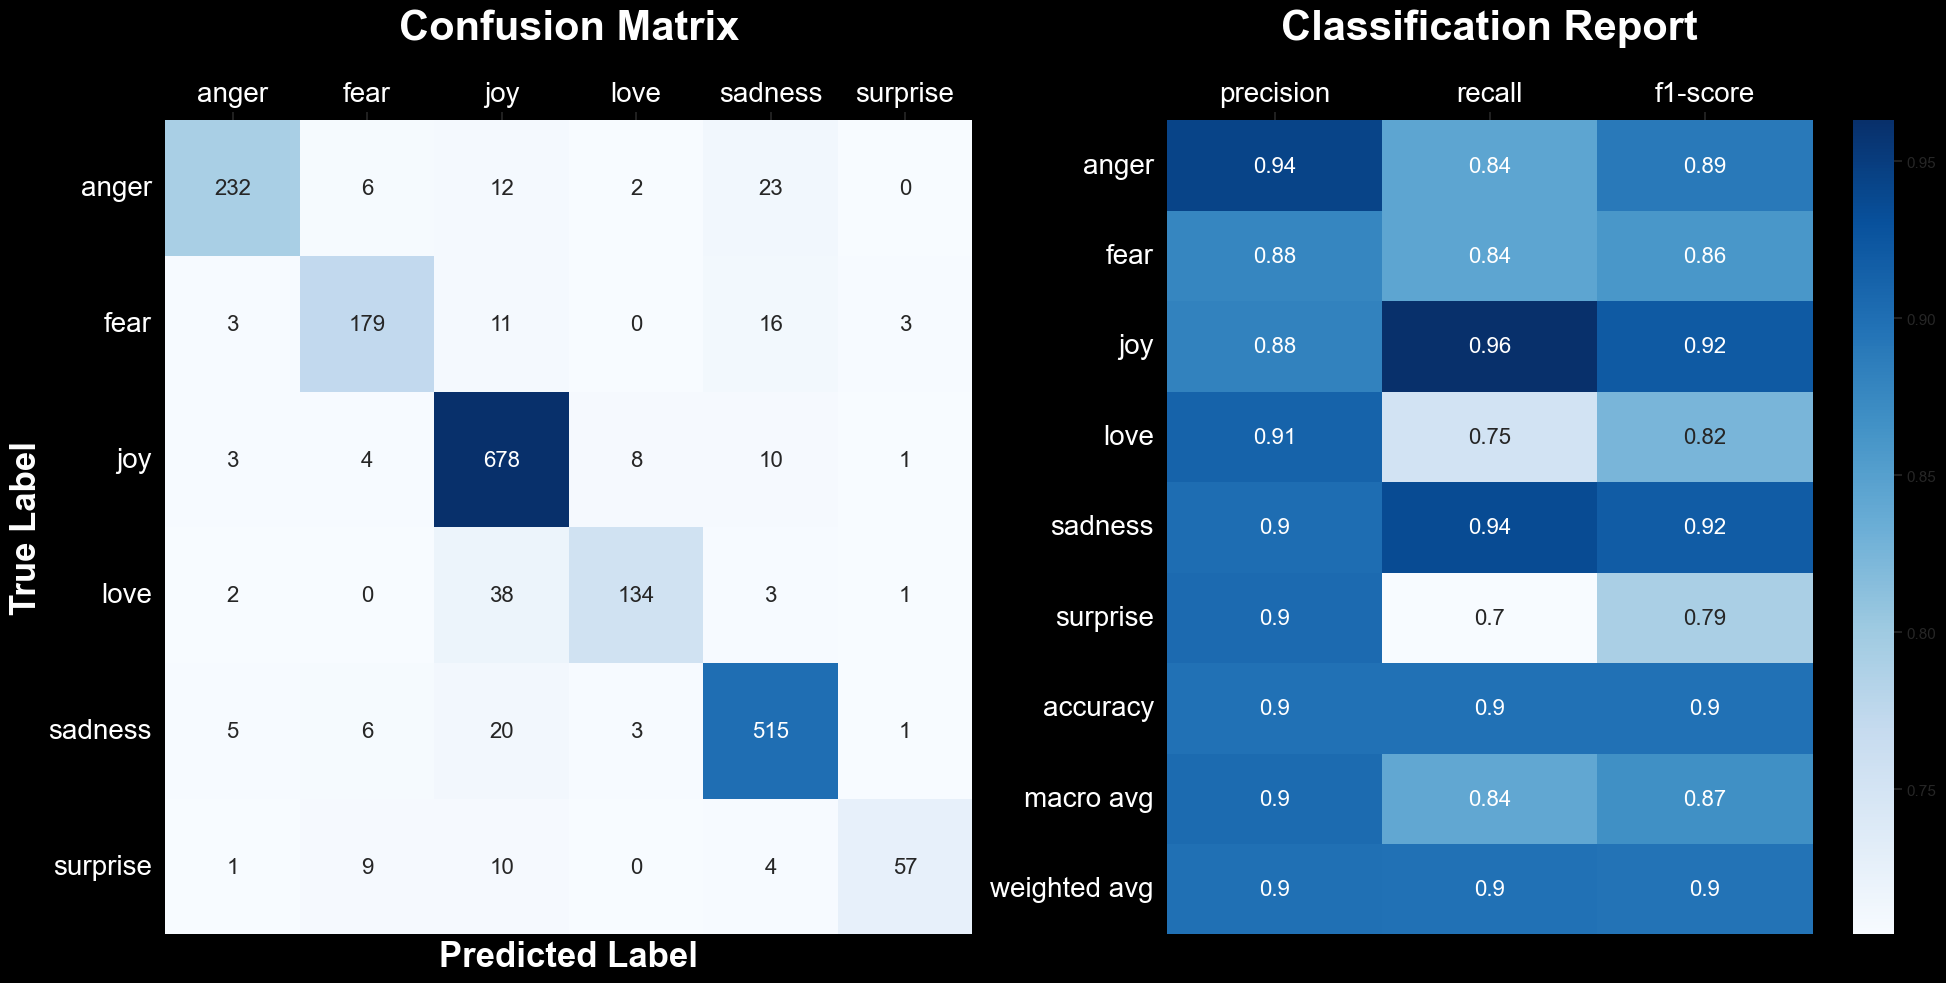

In [51]:
report = classification_report(val['emotion'], rf_gs_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(val['emotion'], rf_gs_predict)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1).xaxis.tick_top()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',cbar_kws=None, cbar=False,annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=30, weight='bold', color='white',pad = 30)
plt.ylabel('True Label', fontsize=25, color='white',weight='bold')
plt.xlabel('Predicted Label', fontsize=25, color='white',weight='bold')
plt.xticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)
plt.yticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)


plt.subplot(1, 2, 2).xaxis.tick_top()
plt.title("Classification Report", fontdict={'size': 30, 'weight': 'bold', 'color': 'white'},pad= 30)
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', cbar_kws=None, annot_kws={"size": 16})
plt.xticks(color='white',fontsize=20)
plt.yticks(color='white',fontsize=20,rotation = 0)



plt.tight_layout()
plt.show()

In [53]:
print(classification_report(val['emotion'], rf_gs_predict))

              precision    recall  f1-score   support

       anger       0.94      0.84      0.89       275
        fear       0.88      0.84      0.86       212
         joy       0.88      0.96      0.92       704
        love       0.91      0.75      0.82       178
     sadness       0.90      0.94      0.92       550
    surprise       0.90      0.70      0.79        81

    accuracy                           0.90      2000
   macro avg       0.90      0.84      0.87      2000
weighted avg       0.90      0.90      0.90      2000



In [54]:
lg_gs = GridSearchCV(lg_pipe, param_grid=lg_params, cv = 5, verbose = 1, n_jobs = -1)

lg_gs.fit(train['text'], train['emotion'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lg__C': [10], 'lg__solver': ['newton-cholesky'],
                         'tvec__max_features': [6000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [55]:
lg_model = lg_gs.best_estimator_
lg_model_par = lg_gs.best_params_
lg_model_par

{'lg__C': 10,
 'lg__solver': 'newton-cholesky',
 'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [56]:
lg_gs.score(train['text'], train['emotion'])

0.988625

In [57]:
lg_gs.score(val['text'], val['emotion'])

0.904

In [58]:
lg_gs_predict = lg_model.predict(val['text'])

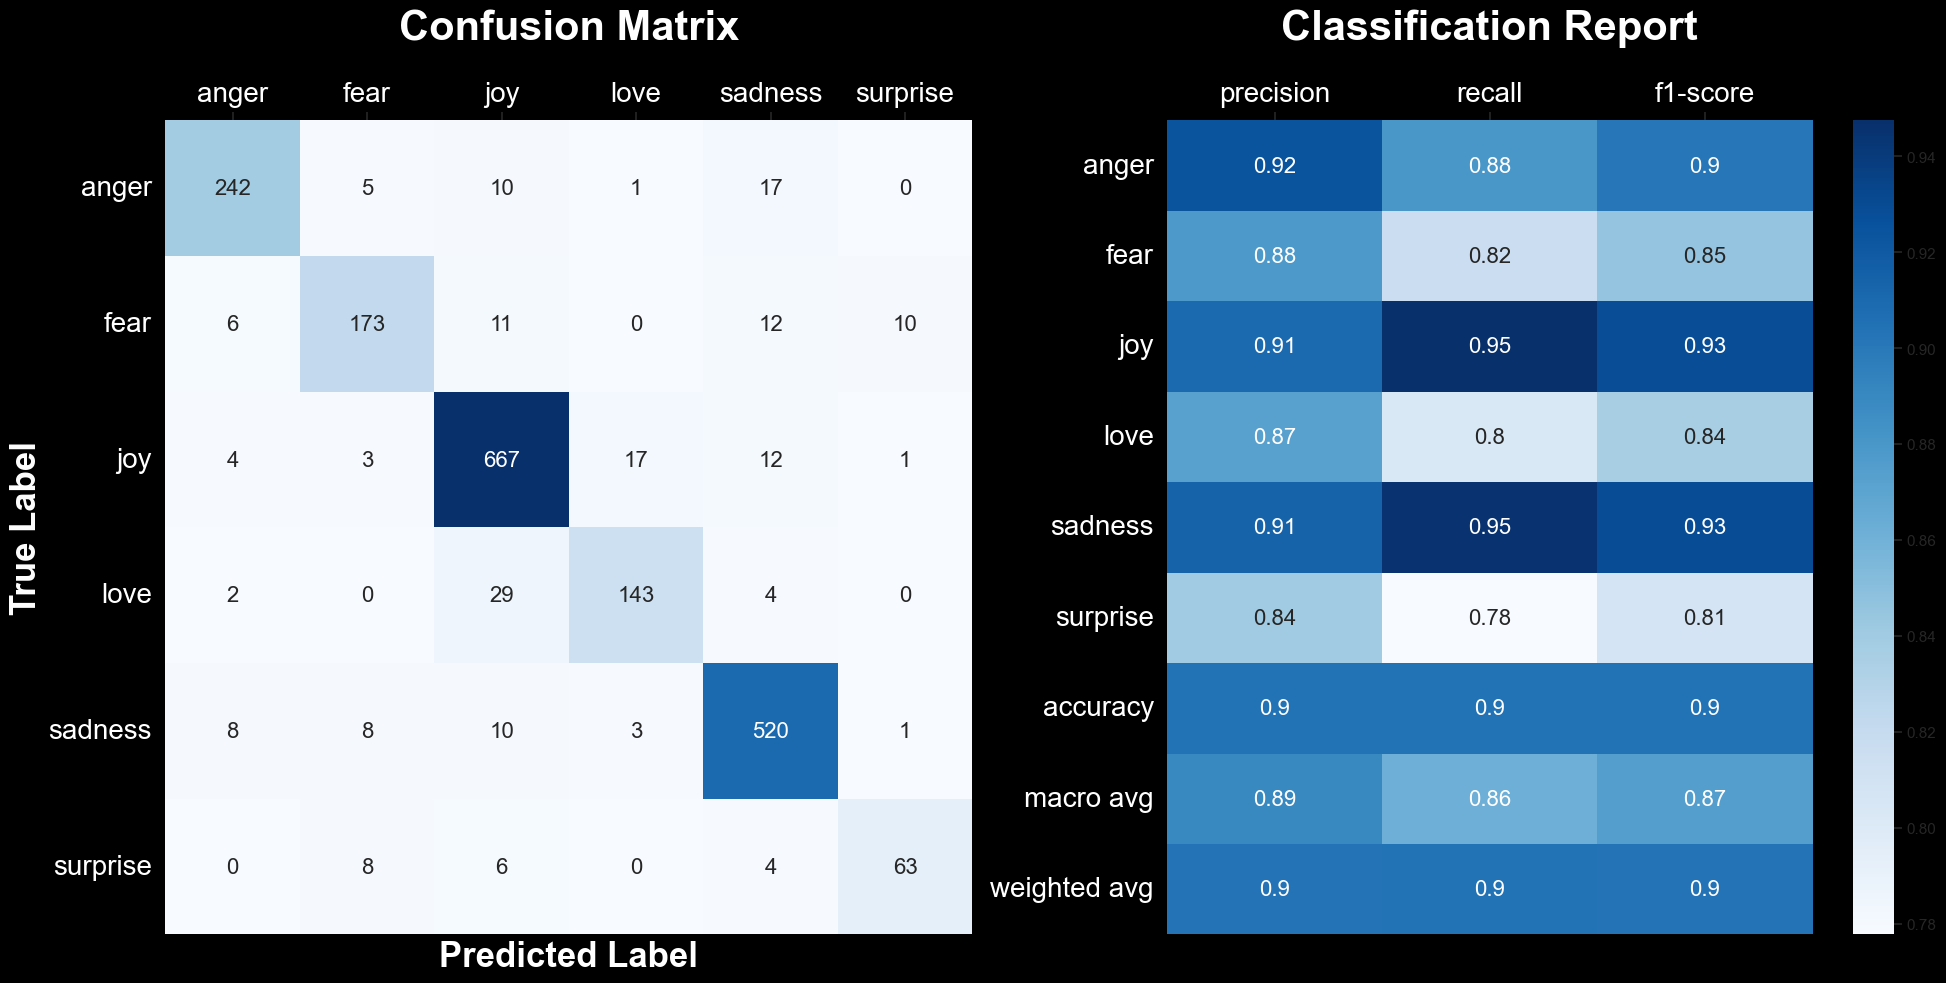

In [59]:
report = classification_report(val['emotion'], lg_gs_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(val['emotion'], lg_gs_predict)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1).xaxis.tick_top()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',cbar_kws=None, cbar=False,annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=30, weight='bold', color='white',pad = 30)
plt.ylabel('True Label', fontsize=25, color='white',weight='bold')
plt.xlabel('Predicted Label', fontsize=25, color='white',weight='bold')
plt.xticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)
plt.yticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)


plt.subplot(1, 2, 2).xaxis.tick_top()
plt.title("Classification Report", fontdict={'size': 30, 'weight': 'bold', 'color': 'white'},pad= 30)
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', cbar_kws=None, annot_kws={"size": 16})
plt.xticks(color='white',fontsize=20)
plt.yticks(color='white',fontsize=20,rotation = 0)



plt.tight_layout()
plt.show()

In [60]:
print(classification_report(val['emotion'], lg_gs_predict))

              precision    recall  f1-score   support

       anger       0.92      0.88      0.90       275
        fear       0.88      0.82      0.85       212
         joy       0.91      0.95      0.93       704
        love       0.87      0.80      0.84       178
     sadness       0.91      0.95      0.93       550
    surprise       0.84      0.78      0.81        81

    accuracy                           0.90      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000



In [104]:
le = LabelEncoder()
xgtrain = le.fit_transform(train['emotion'])
xgval = le.fit_transform(val['emotion'])
xgtest = le.fit_transform(test['emotion'])

In [62]:
xg_gs = GridSearchCV(xg_pipe, param_grid=xg_params, cv = 5, verbose = 1, n_jobs = -1)

xg_gs.fit(train['text'], xgtrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'tvec__max_features': [6000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english'],
                         'xg__colsample_bytree': [0.6], 'xg__gamma': [2],
                         'xg__max_depth': [200], 'xg__max_leaves': [2],
                         'xg__min_child_weight': [5], 'xg__subsample': [1]},
             verbose=1)

In [63]:
xg_model = xg_gs.best_estimator_
xg_model_par = xg_gs.best_params_
xg_model_par

{'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english',
 'xg__colsample_bytree': 0.6,
 'xg__gamma': 2,
 'xg__max_depth': 200,
 'xg__max_leaves': 2,
 'xg__min_child_weight': 5,
 'xg__subsample': 1}

In [64]:
xg_gs.score(train['text'], xgtrain)

0.95475

In [65]:
xg_gs.score(val['text'], xgval)

0.898

In [66]:
xg_gs_predict = le.inverse_transform(xg_model.predict(val['text']))

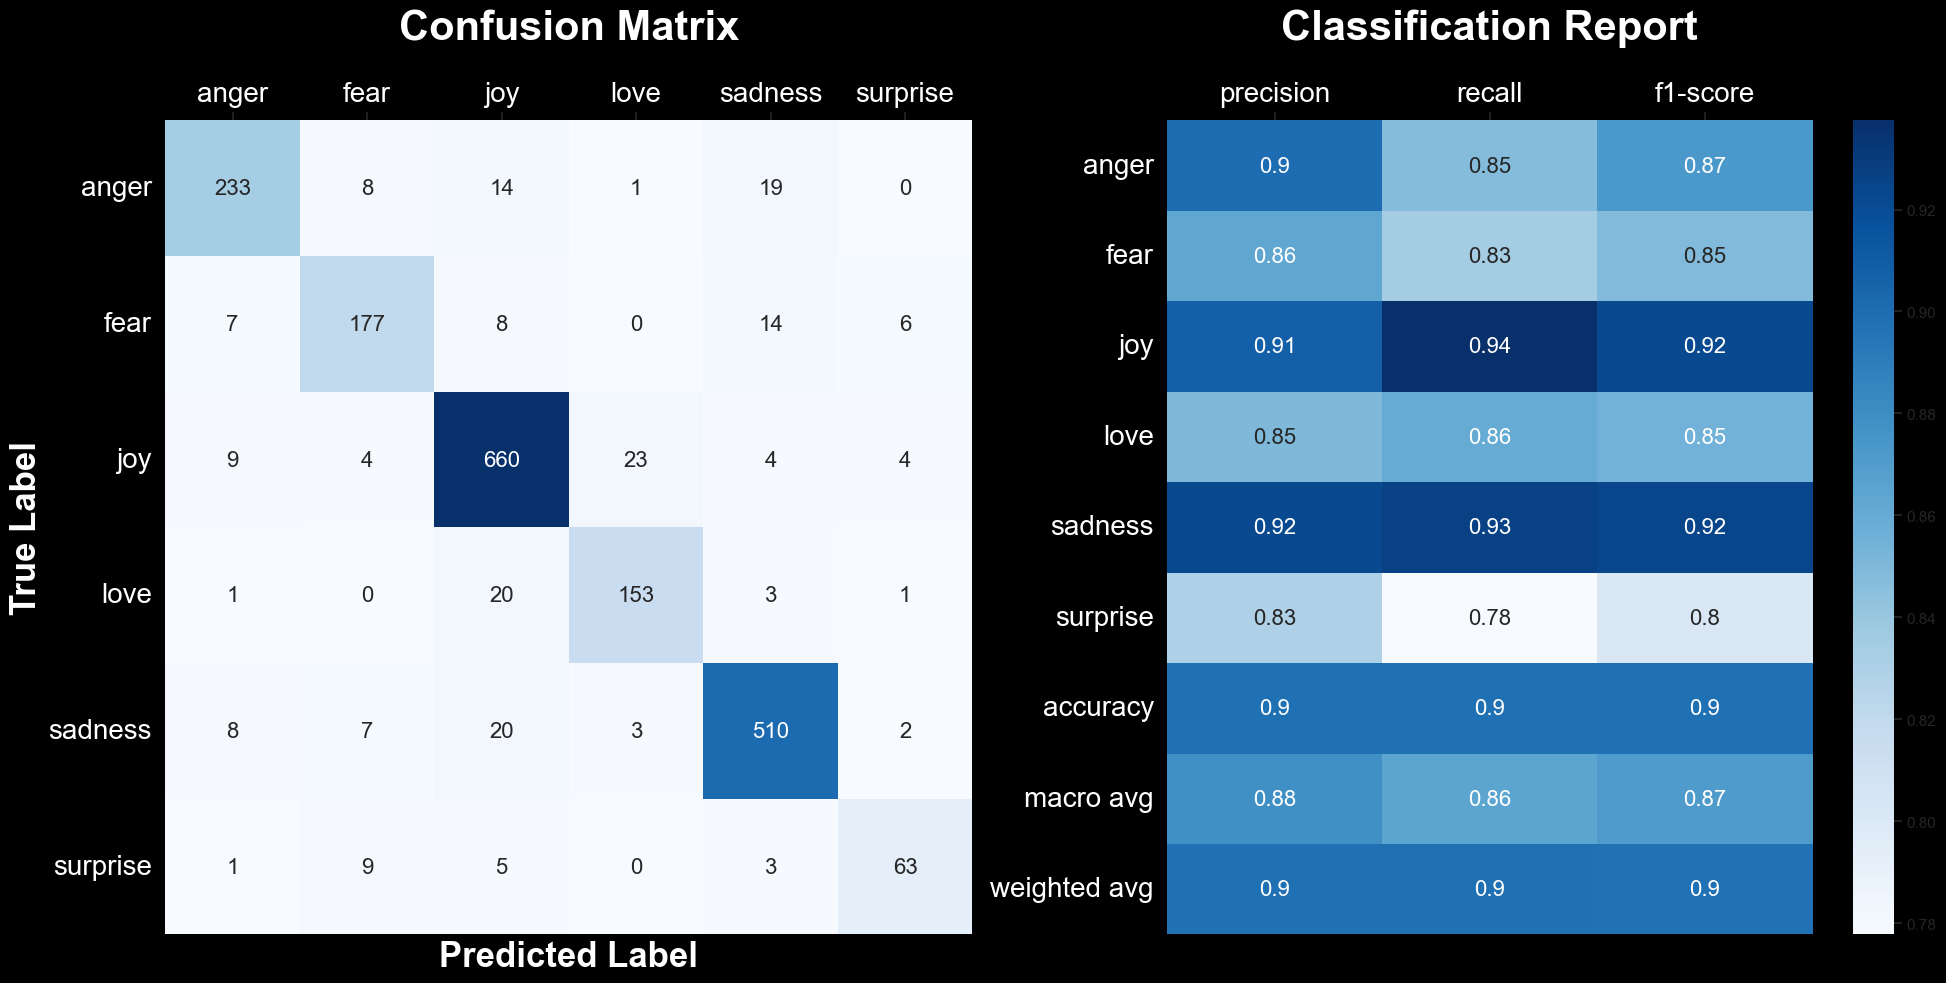

In [67]:
report = classification_report(val['emotion'], xg_gs_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(val['emotion'], xg_gs_predict)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1).xaxis.tick_top()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',cbar_kws=None, cbar=False,annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=30, weight='bold', color='white',pad = 30)
plt.ylabel('True Label', fontsize=25, color='white',weight='bold')
plt.xlabel('Predicted Label', fontsize=25, color='white',weight='bold')
plt.xticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)
plt.yticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)


plt.subplot(1, 2, 2).xaxis.tick_top()
plt.title("Classification Report", fontdict={'size': 30, 'weight': 'bold', 'color': 'white'},pad= 30)
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', cbar_kws=None, annot_kws={"size": 16})
plt.xticks(color='white',fontsize=20)
plt.yticks(color='white',fontsize=20,rotation = 0)



plt.tight_layout()
plt.show()

In [68]:
print(classification_report(val['emotion'], xg_gs_predict))

              precision    recall  f1-score   support

       anger       0.90      0.85      0.87       275
        fear       0.86      0.83      0.85       212
         joy       0.91      0.94      0.92       704
        love       0.85      0.86      0.85       178
     sadness       0.92      0.93      0.92       550
    surprise       0.83      0.78      0.80        81

    accuracy                           0.90      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000



In [69]:
ml_gs = GridSearchCV(ml_pipe, param_grid=ml_params, cv = 5, verbose = 1, n_jobs = -1)

ml_gs.fit(train['text'], train['emotion'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('ml', MLPClassifier())]),
             n_jobs=-1,
             param_grid={'ml__activation': ['relu'],
                         'ml__hidden_layer_sizes': [(20,)],
                         'ml__learning_rate': ['constant'],
                         'ml__solver': ['adam'], 'tvec__max_features': [6000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [70]:
ml_model = ml_gs.best_estimator_
ml_model_par = ml_gs.best_params_
ml_model_par

{'ml__activation': 'relu',
 'ml__hidden_layer_sizes': (20,),
 'ml__learning_rate': 'constant',
 'ml__solver': 'adam',
 'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [71]:
ml_gs.score(train['text'], train['emotion'])

0.996875

In [72]:
ml_gs.score(val['text'], val['emotion'])

0.886

In [73]:
ml_gs_predict = ml_model.predict(val['text'])

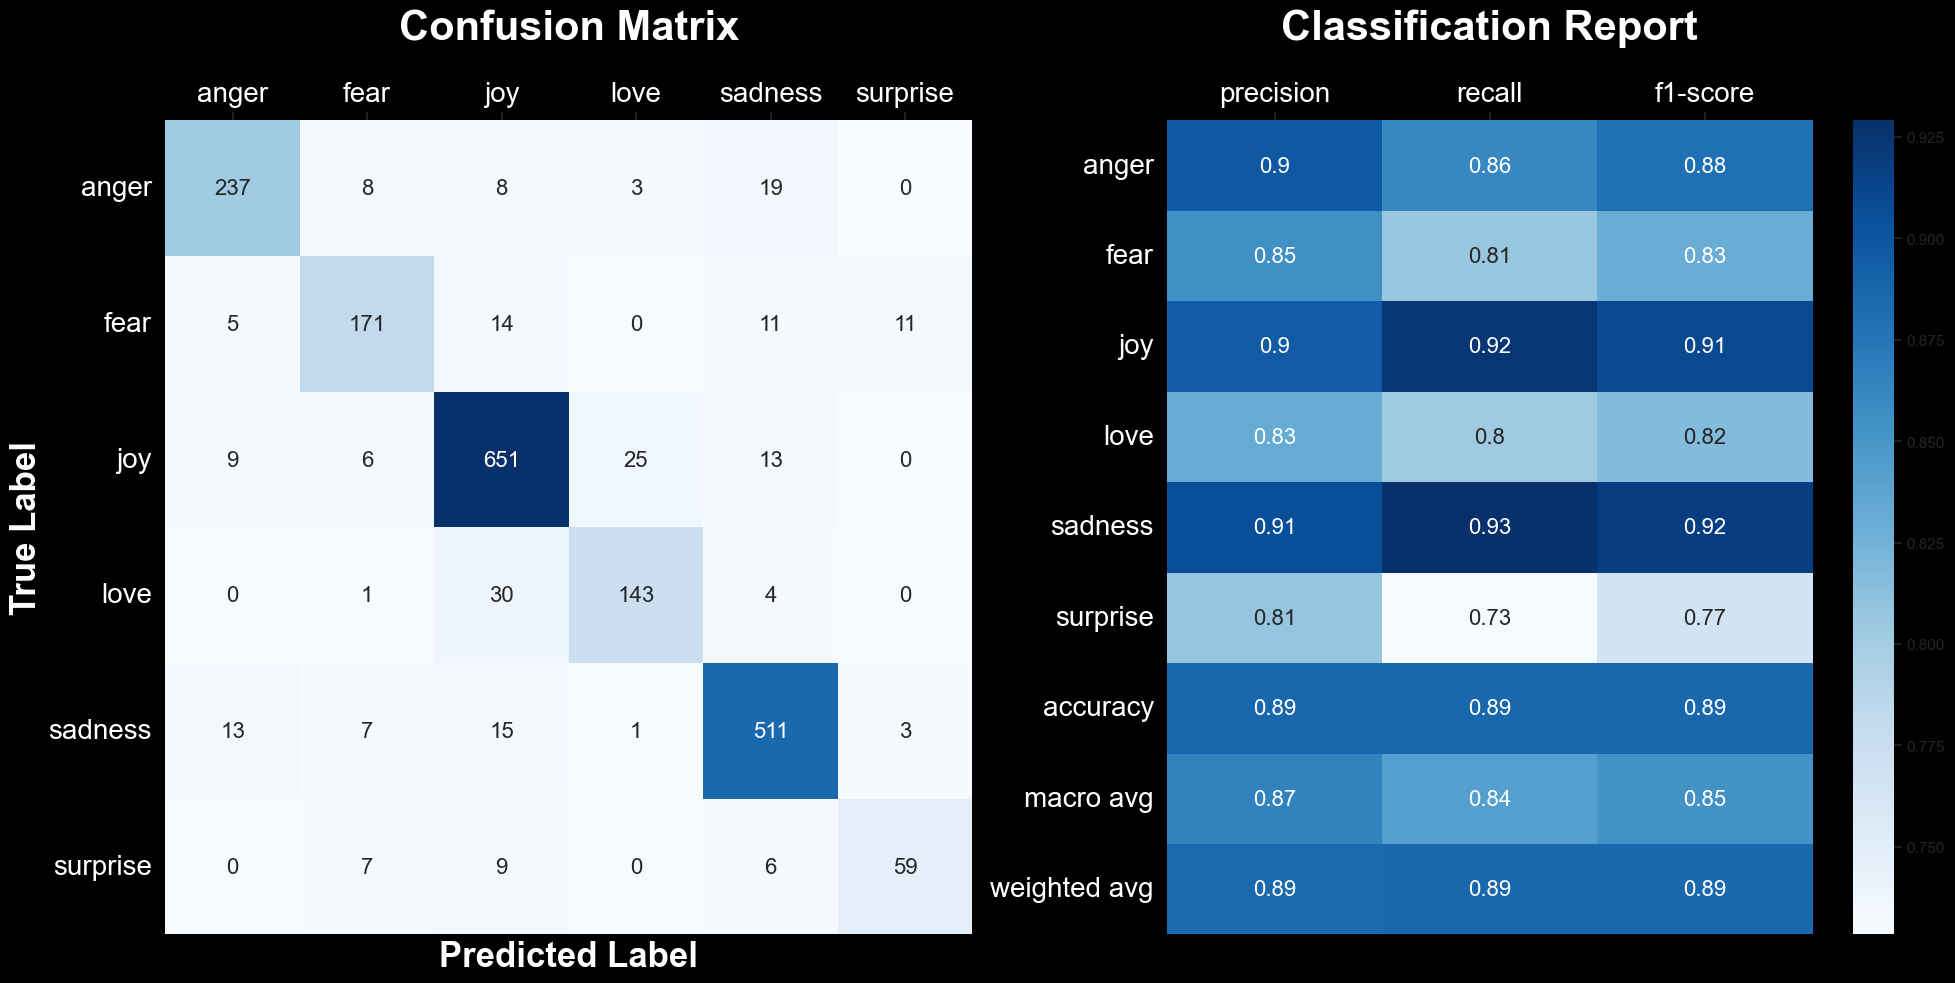

In [74]:
report = classification_report(val['emotion'], ml_gs_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
cm = confusion_matrix(val['emotion'], ml_gs_predict)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1).xaxis.tick_top()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',cbar_kws=None, cbar=False,annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=30, weight='bold', color='white',pad = 30)
plt.ylabel('True Label', fontsize=25, color='white',weight='bold')
plt.xlabel('Predicted Label', fontsize=25, color='white',weight='bold')
plt.xticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)
plt.yticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)


plt.subplot(1, 2, 2).xaxis.tick_top()
plt.title("Classification Report", fontdict={'size': 30, 'weight': 'bold', 'color': 'white'},pad= 30)
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', cbar_kws=None, annot_kws={"size": 16})
plt.xticks(color='white',fontsize=20)
plt.yticks(color='white',fontsize=20,rotation = 0)


plt.tight_layout()
plt.show()

In [75]:
print(classification_report(val['emotion'], ml_gs_predict))

              precision    recall  f1-score   support

       anger       0.90      0.86      0.88       275
        fear       0.85      0.81      0.83       212
         joy       0.90      0.92      0.91       704
        love       0.83      0.80      0.82       178
     sadness       0.91      0.93      0.92       550
    surprise       0.81      0.73      0.77        81

    accuracy                           0.89      2000
   macro avg       0.87      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000



In [76]:
sv_gs = GridSearchCV(sv_pipe, param_grid=sv_params, cv = 5, verbose = 1, n_jobs = -1)

sv_gs.fit(train['text'], train['emotion'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('sv', SVC())]),
             n_jobs=-1,
             param_grid={'sv__C': [1], 'sv__gamma': [1],
                         'sv__kernel': ['linear'], 'tvec__max_features': [6000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [77]:
sv_model = sv_gs.best_estimator_
sv_model_par = sv_gs.best_params_
sv_model_par

{'sv__C': 1,
 'sv__gamma': 1,
 'sv__kernel': 'linear',
 'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [78]:
sv_gs.score(train['text'], train['emotion'])

0.9578125

In [79]:
sv_gs.score(val['text'], val['emotion'])

0.8985

In [80]:
sv_gs_predict = sv_model.predict(val['text'])

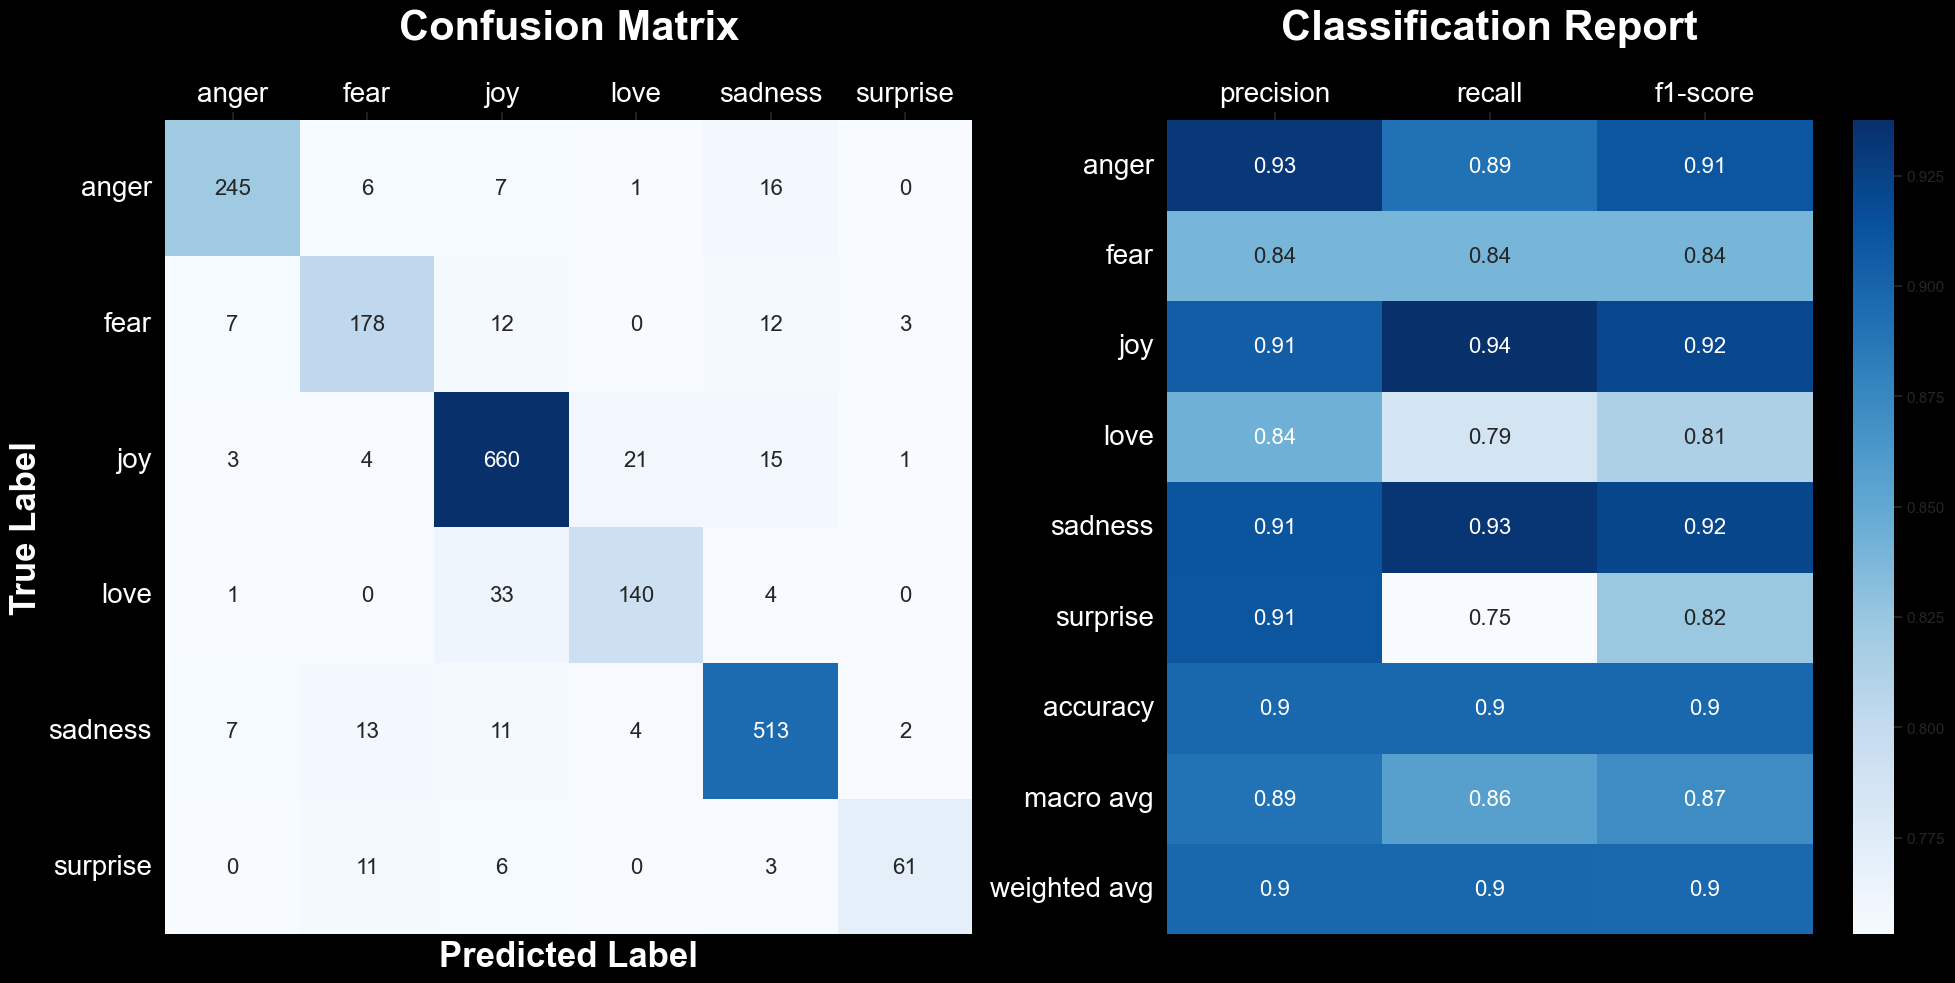

In [81]:
report = classification_report(val['emotion'], sv_gs_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
cm = confusion_matrix(val['emotion'], sv_gs_predict)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1).xaxis.tick_top()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',cbar_kws=None, cbar=False,annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=30, weight='bold', color='white',pad = 30)
plt.ylabel('True Label', fontsize=25, color='white',weight='bold')
plt.xlabel('Predicted Label', fontsize=25, color='white',weight='bold')
plt.xticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)
plt.yticks(np.arange(len(np.unique(val['emotion'])))+0.5, np.unique(val['emotion']),rotation = 0, color='white',fontsize=20)


plt.subplot(1, 2, 2).xaxis.tick_top()
plt.title("Classification Report", fontdict={'size': 30, 'weight': 'bold', 'color': 'white'},pad= 30)
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', cbar_kws=None, annot_kws={"size": 16})
plt.xticks(color='white',fontsize=20)
plt.yticks(color='white',fontsize=20,rotation = 0)

plt.tight_layout()
plt.show()

In [82]:
print(classification_report(val['emotion'], sv_gs_predict))

              precision    recall  f1-score   support

       anger       0.93      0.89      0.91       275
        fear       0.84      0.84      0.84       212
         joy       0.91      0.94      0.92       704
        love       0.84      0.79      0.81       178
     sadness       0.91      0.93      0.92       550
    surprise       0.91      0.75      0.82        81

    accuracy                           0.90      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000



In [83]:
# best_model_pipe = Pipeline([
#  ('tvec', TfidfVectorizer(max_features = 2000, ngram_range = (1,2),stop_words = 'english')),
#  ('ml', MLPClassifier(hidden_layer_sizes=20,activation = 'relu',solver = 'adam',alpha=0.05,learning_rate = 'constant'))
# ])


In [103]:
model = [nb_model,rf_model,lg_model,ml_model,sv_model]

In [106]:
for i in model :
  print(classification_report(test['emotion'], i.predict(test['text'])))
print(classification_report(test['emotion'], le.inverse_transform(xg_model.predict(test['text']))))

              precision    recall  f1-score   support

       anger       0.86      0.87      0.87       275
        fear       0.86      0.87      0.86       224
         joy       0.90      0.91      0.91       695
        love       0.73      0.82      0.77       159
     sadness       0.93      0.90      0.92       581
    surprise       0.81      0.59      0.68        66

    accuracy                           0.88      2000
   macro avg       0.85      0.83      0.84      2000
weighted avg       0.88      0.88      0.88      2000

              precision    recall  f1-score   support

       anger       0.91      0.85      0.88       275
        fear       0.85      0.83      0.84       224
         joy       0.86      0.95      0.90       695
        love       0.85      0.65      0.74       159
     sadness       0.92      0.94      0.93       581
    surprise       0.77      0.52      0.62        66

    accuracy                           0.88      2000
   macro avg       0.86

In [94]:
# print("Naive Bayes Model's accuracy = " ,classification_report(test['emotion'], nb_model.predict(test['text'])).strip('').split()[35])
# print("Random Forest Model's accuracy = " , classification_report(test['emotion'], rf_model.predict(test['text'])).strip('').split()[35])
# print("Logistic Regression Model's accuracy = " ,classification_report(test['emotion'], lg_model.predict(test['text'])).strip('').split()[35])
# print("Nueral Netwok Model's accuracy = " ,classification_report(test['emotion'], ml_model.predict(test['text'])).strip('').split()[35])
# print("XGBoost Model's accuracy = " ,classification_report(xgtest, xg_model.predict(test['text'])).strip('').split()[35])

In [111]:
accuracy = [float(classification_report(test['emotion'], i.predict(test['text'])).strip('').split()[35]) for i in model]
accuracy.append(float(classification_report(test['emotion'], le.inverse_transform(xg_model.predict(test['text']))).strip('').split()[35]))

In [112]:
report = {
    'Model': ["Naive Bayes Model's accuracy","Random Forest Model's accuracy","Logistic Regression Model's accuracy","Neural Netwok Model's accuracy","Support Vector Machine's accuracy","XGBoost Model's accuracy"],
    'Accuracy':  accuracy
}

df = pd.DataFrame(report)
df

,Model,Accuracy
0,Naive Bayes Model's accuracy,0.88
1,Random Forest Model's accuracy,0.88
2,Logistic Regression Model's accuracy,0.90
3,Neural Netwok Model's accuracy,0.87
4,Support Vector Machine's accuracy,0.89
5,XGBoost Model's accuracy,0.89


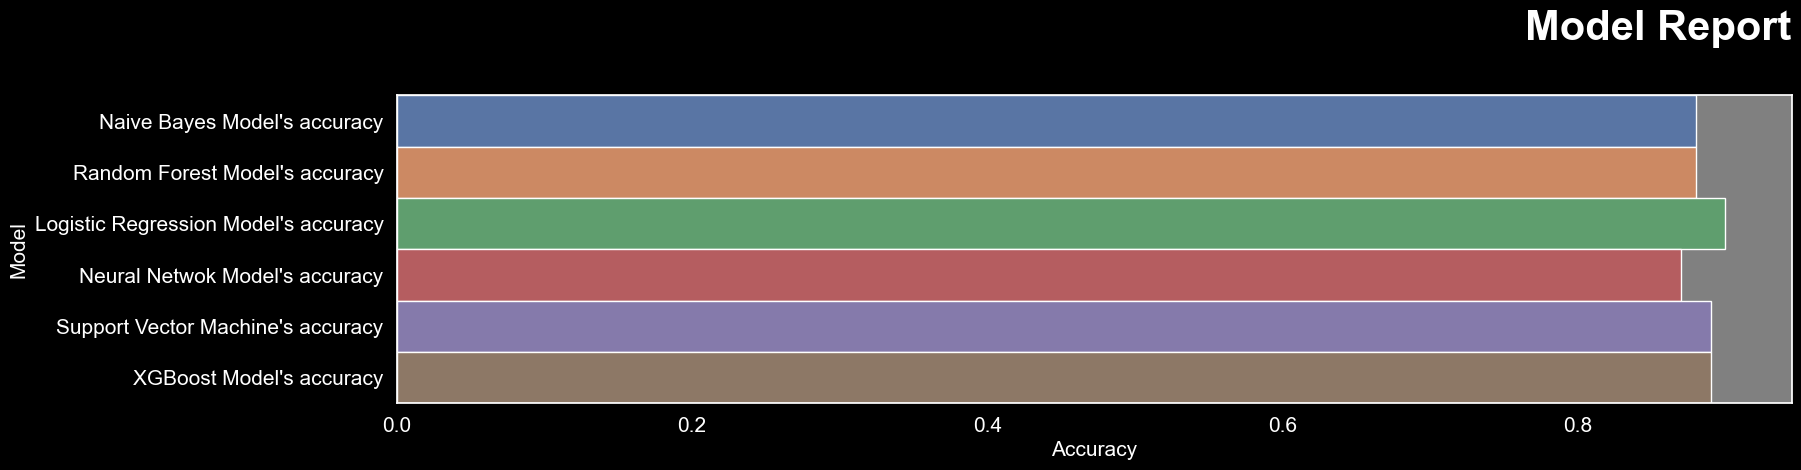

In [113]:
plt.figure(figsize=(18, 4))
sns.barplot(x='Accuracy', y='Model', data=df, width = 1)
plt.yticks(fontsize=15 , color = 'white')
plt.xticks(fontsize=15, color = 'white')
plt.title('Model Report', fontdict={'size' : 30, 'weight' : 'bold', 'color' : 'white'}, pad = 40, loc = 'Right')
plt.ylabel('Model', fontsize=15, color = 'white')
plt.xlabel('Accuracy', fontsize=15, color = 'white')

sns.set_theme(rc={'axes.facecolor':'gray', 'figure.facecolor':'black'})


plt.show()

In [114]:
title = pd.DataFrame(rf_model.steps[1][1].feature_importances_,nb_model.steps[0][1].get_feature_names_out(), columns=['importance']).reset_index()
title = title.sort_values('importance', ascending = False).head(20)
title

,index,importance
1962,feeling beloved,0.017002
1964,feeling bit,0.010317
2991,intense,0.006132
2510,gotten used,0.006090
5777,wasn,0.004807
2811,hurt wa,0.004047
5035,stood,0.003759
135,anger,0.003606
3642,make feel,0.003495
5857,wife,0.003470


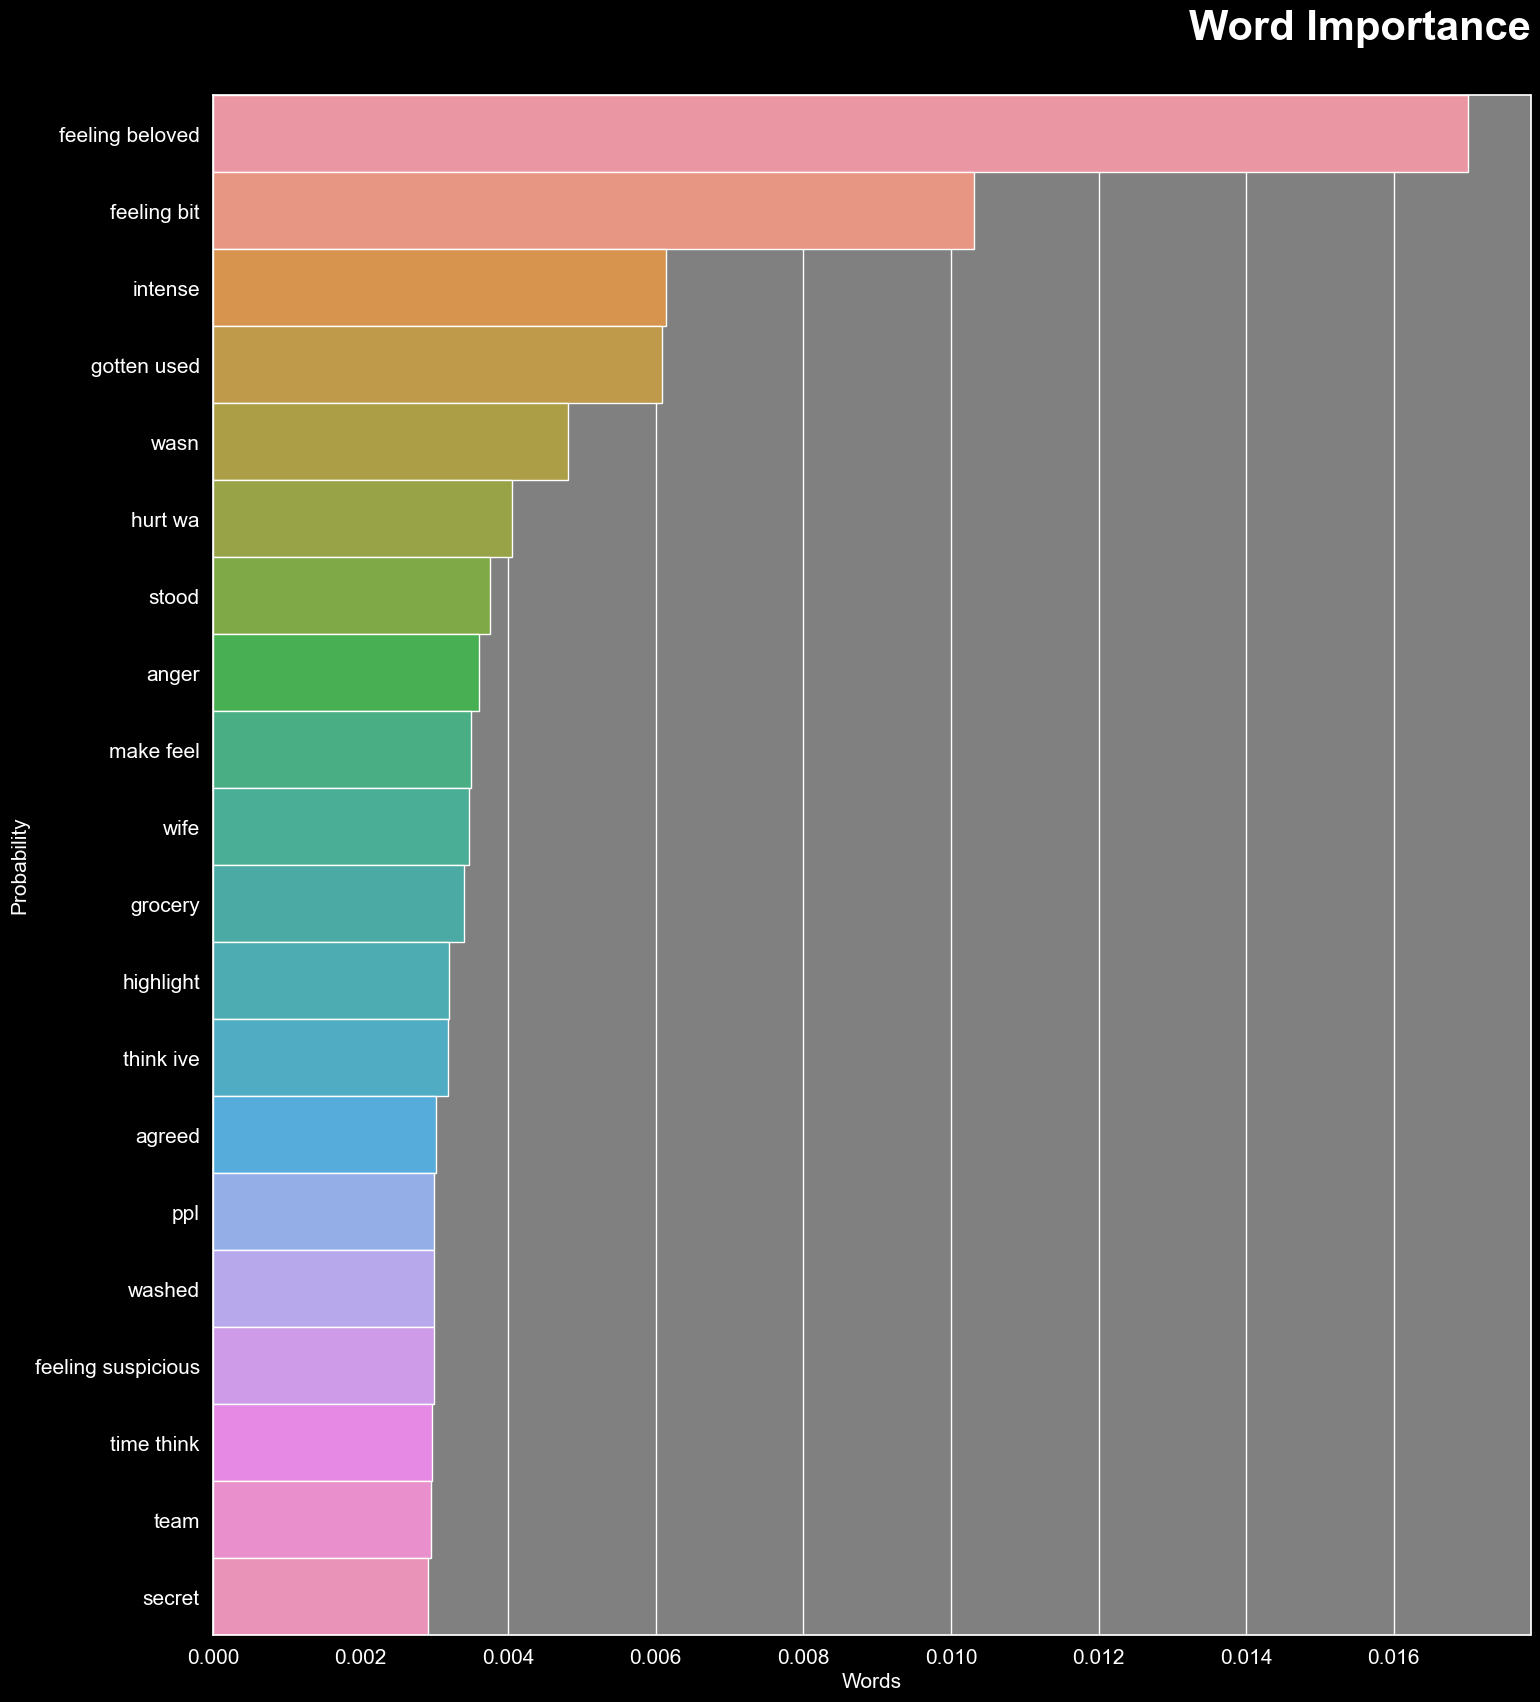

In [115]:
plt.figure(figsize=(17, 20))
sns.barplot(x='importance', y='index', data=title, width = 1)

plt.yticks(fontsize=15 , color = 'white')
plt.xticks(fontsize=15, color = 'white')
plt.title('Word Importance', fontdict={'size' : 30, 'weight' : 'bold', 'color' : 'white'}, pad = 40, loc = 'Right')
plt.ylabel('Probability', fontsize=15, color = 'white')
plt.xlabel('Words', fontsize=15, color = 'white')

sns.set_theme(rc={'axes.facecolor':'gray', 'figure.facecolor':'black'})

plt.show()